In [3]:
import zipfile as zp
import pandas as pd
# from pypac import PACSession as Session #or use requests below if non-ONS
#from requests import Session
from io import BytesIO
import os
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon

%matplotlib notebook

###  Read in files


In [4]:
# Path to zip files
path = "Data/"
print (path)


Data/


In [5]:
proc_data=pd.read_csv(path + "final_data.csv")
codes=pd.read_csv(path+"processed_data.csv")
# pd.read_excel((path[:-25])+'final_data.xlsx', 'Data', index_col=None)


In [6]:
proc_data.head()

,pcstrip,Year,NUMBER_OF_PATIENTS,SHA,PCT,oseast1m,osnrth1m,lsoa11,msoa11,ru11ind,...,alzheimers_zscore,blood pressure_zscore,hypertension_zscore,diabetes_zscore,cardiovascular disease_zscore,insomnia_zscore,addiction_zscore,social anxiety_zscore,loneliness_zscore,loneills
0,AL100BS,2016,3171.916667,Q58,06K,522443,208996,E01023927,E02004990,C1,...,-0.611385,0.281695,-0.311210,-0.457039,-0.403666,-0.470144,-0.088685,-0.206785,-0.696324,-2.090846
1,AL100BS,2017,7990.750000,Q58,06K,522443,208996,E01023927,E02004990,C1,...,-0.092288,0.467674,-0.262544,-0.275512,-0.192223,-0.434156,-0.086022,0.199294,-0.315757,-0.894752
2,AL100BS,2018,9624.416667,Q58,06K,522443,208996,E01023927,E02004990,C1,...,0.196357,0.709112,-0.041739,0.129947,0.097690,-0.526029,-0.088685,0.937151,0.328936,0.616736
3,AL100NL,2016,4195.000000,Q58,06K,522442,208808,E01023920,E02004991,C1,...,-0.590078,-0.046907,0.456131,-0.055416,-0.127068,-0.120109,-0.087082,0.213252,-0.086705,-0.262717
4,AL100NL,2017,10554.666670,Q58,06K,522442,208808,E01023920,E02004991,C1,...,-0.234218,-0.103745,0.397698,0.041207,-0.093135,0.088218,-0.088685,0.361831,0.026190,0.541874


In [7]:
codes.head()

,Unnamed: 0,PracCode,Town,Postcode,blood pressure,ITEMS,loneliness,social anxiety,insomnia,alzheimers,...,Street,hypertension,cardiovascular disease,PCT,Date,addiction,Town2,CenterName,depression,diabetes
0,0,A81002,STOCKTON ON TEES,TS18 2AW,2936,36817,9675,815,41,90,...,FARRER STREET,2412,2595,00K,201810,0,CLEVELAND,QUEENS PARK MEDICAL CTR,2866,711
1,1,A81004,MIDDLESBROUGH,TS5 8SB,1030,19808,4628,396,148,41,...,ACKLAM,1286,1254,00M,201810,0,,TRIMDON AVENUE,1308,389
2,2,A81005,GUISBOROUGH,TS14 7DJ,1230,17000,4274,316,42,35,...,RECTORY LANE,1236,1329,00M,201810,0,,SPRINGWOOD SURGERY,987,279
3,3,A81006,STOCKTON-ON-TEES,TS18 2AT,2073,30509,7953,809,17,73,...,TENNANT STREET,1669,2270,00K,201810,0,CLEVELAND,TENNANT ST MEDICAL PRACT,2438,558
4,4,A81007,HARTLEPOOL,TS24 7PW,889,18189,4087,415,4,32,...,PARK ROAD,1023,990,00K,201810,0,CLEVELAND,ONE LIFE HARTLEPOOL,1536,274


In [8]:
codes = codes.drop(['Unnamed: 0'], axis=1)
codes.head()

,PracCode,Town,Postcode,blood pressure,ITEMS,loneliness,social anxiety,insomnia,alzheimers,pcstrip,...,Street,hypertension,cardiovascular disease,PCT,Date,addiction,Town2,CenterName,depression,diabetes
0,A81002,STOCKTON ON TEES,TS18 2AW,2936,36817,9675,815,41,90,TS182AW,...,FARRER STREET,2412,2595,00K,201810,0,CLEVELAND,QUEENS PARK MEDICAL CTR,2866,711
1,A81004,MIDDLESBROUGH,TS5 8SB,1030,19808,4628,396,148,41,TS58SB,...,ACKLAM,1286,1254,00M,201810,0,,TRIMDON AVENUE,1308,389
2,A81005,GUISBOROUGH,TS14 7DJ,1230,17000,4274,316,42,35,TS147DJ,...,RECTORY LANE,1236,1329,00M,201810,0,,SPRINGWOOD SURGERY,987,279
3,A81006,STOCKTON-ON-TEES,TS18 2AT,2073,30509,7953,809,17,73,TS182AT,...,TENNANT STREET,1669,2270,00K,201810,0,CLEVELAND,TENNANT ST MEDICAL PRACT,2438,558
4,A81007,HARTLEPOOL,TS24 7PW,889,18189,4087,415,4,32,TS247PW,...,PARK ROAD,1023,990,00K,201810,0,CLEVELAND,ONE LIFE HARTLEPOOL,1536,274


In [9]:
merged_data= proc_data.merge( codes , on=['PCT','pcstrip','SHA'])

In [9]:
merged_data.head()

,pcstrip,Year,NUMBER_OF_PATIENTS,SHA,PCT,oseast1m,osnrth1m,lsoa11,msoa11,ru11ind,...,alzheimers,Street,hypertension,cardiovascular disease,Date,addiction,Town2,CenterName,depression,diabetes
0,AL100BS,2016,3171.916667,Q58,06K,522443,208996,E01023927,E02004990,C1,...,41,9/11 WELLFIELD ROAD,1014,1008,201810,0,HERTFORDSHIRE,WRAFTON HOUSE SURGERY,998,353
1,AL100BS,2016,3171.916667,Q58,06K,522443,208996,E01023927,E02004990,C1,...,39,9/11 WELLFIELD ROAD,947,982,201811,0,HERTFORDSHIRE,WRAFTON HOUSE SURGERY,922,334
2,AL100BS,2016,3171.916667,Q58,06K,522443,208996,E01023927,E02004990,C1,...,41,9/11 WELLFIELD ROAD,969,924,201812,0,HERTFORDSHIRE,WRAFTON HOUSE SURGERY,876,325
3,AL100BS,2017,7990.750000,Q58,06K,522443,208996,E01023927,E02004990,C1,...,41,9/11 WELLFIELD ROAD,1014,1008,201810,0,HERTFORDSHIRE,WRAFTON HOUSE SURGERY,998,353
4,AL100BS,2017,7990.750000,Q58,06K,522443,208996,E01023927,E02004990,C1,...,39,9/11 WELLFIELD ROAD,947,982,201811,0,HERTFORDSHIRE,WRAFTON HOUSE SURGERY,922,334


In [11]:
merged_data.dtypes

pcstrip                           object
Year                               int64
NUMBER_OF_PATIENTS               float64
SHA                               object
PCT                               object
oseast1m                           int64
osnrth1m                           int64
lsoa11                            object
msoa11                            object
ru11ind                           object
rgn                               object
laua                              object
imd                                int64
depression_perc                  float64
alzheimers_perc                  float64
blood pressure_perc              float64
hypertension_perc                float64
diabetes_perc                    float64
cardiovascular disease_perc      float64
insomnia_perc                    float64
addiction_perc                   float64
social anxiety_perc              float64
loneliness_perc                  float64
depression_zscore                float64
alzheimers_zscor

In [12]:
geo_data = gpd.GeoDataFrame(proc_data, 
                            crs = {'init':'epsg:27700'}, 
                            geometry = proc_data.apply(lambda geom: Point(geom['oseast1m'],geom['osnrth1m']),axis=1))
geo_data.head(100)

,pcstrip,Year,NUMBER_OF_PATIENTS,SHA,PCT,oseast1m,osnrth1m,lsoa11,msoa11,ru11ind,...,blood pressure_zscore,hypertension_zscore,diabetes_zscore,cardiovascular disease_zscore,insomnia_zscore,addiction_zscore,social anxiety_zscore,loneliness_zscore,loneills,geometry
0,AL100BS,2016,3171.916667,Q58,06K,522443,208996,E01023927,E02004990,C1,...,0.281695,-0.311210,-0.457039,-0.403666,-0.470144,-0.088685,-0.206785,-0.696324,-2.090846,POINT (522443 208996)
1,AL100BS,2017,7990.750000,Q58,06K,522443,208996,E01023927,E02004990,C1,...,0.467674,-0.262544,-0.275512,-0.192223,-0.434156,-0.086022,0.199294,-0.315757,-0.894752,POINT (522443 208996)
2,AL100BS,2018,9624.416667,Q58,06K,522443,208996,E01023927,E02004990,C1,...,0.709112,-0.041739,0.129947,0.097690,-0.526029,-0.088685,0.937151,0.328936,0.616736,POINT (522443 208996)
3,AL100NL,2016,4195.000000,Q58,06K,522442,208808,E01023920,E02004991,C1,...,-0.046907,0.456131,-0.055416,-0.127068,-0.120109,-0.087082,0.213252,-0.086705,-0.262717,POINT (522442 208808)
4,AL100NL,2017,10554.666670,Q58,06K,522442,208808,E01023920,E02004991,C1,...,-0.103745,0.397698,0.041207,-0.093135,0.088218,-0.088685,0.361831,0.026190,0.541874,POINT (522442 208808)
5,AL100NL,2018,12741.333330,Q58,06K,522442,208808,E01023920,E02004991,C1,...,-0.162560,0.215180,0.136748,0.016282,0.037470,-0.088685,0.796187,0.133300,1.139326,POINT (522442 208808)
6,AL108HP,2016,3262.916667,Q58,06K,522445,208444,E01023922,E02004991,C1,...,1.077161,0.220267,0.249795,0.789531,-0.853530,-0.088685,0.178562,0.439029,-1.693188,POINT (522445 208444)
7,AL108HP,2017,8472.666667,Q58,06K,522445,208444,E01023922,E02004991,C1,...,1.119898,0.200049,0.261105,0.745844,-0.888226,-0.088685,0.340232,0.513768,-1.016955,POINT (522445 208444)
8,AL108HP,2018,10664.750000,Q58,06K,522445,208444,E01023922,E02004991,C1,...,1.187791,0.208437,0.227969,0.768053,-0.935779,-0.087967,0.587106,0.681306,-0.487490,POINT (522445 208444)
9,AL13FY,2018,4034.666667,Q58,06N,515627,206743,E01023729,E02004935,C1,...,0.584319,3.043799,3.132234,1.766908,-1.010666,-0.088685,-1.168025,2.245227,-1.439142,POINT (515627 206743)


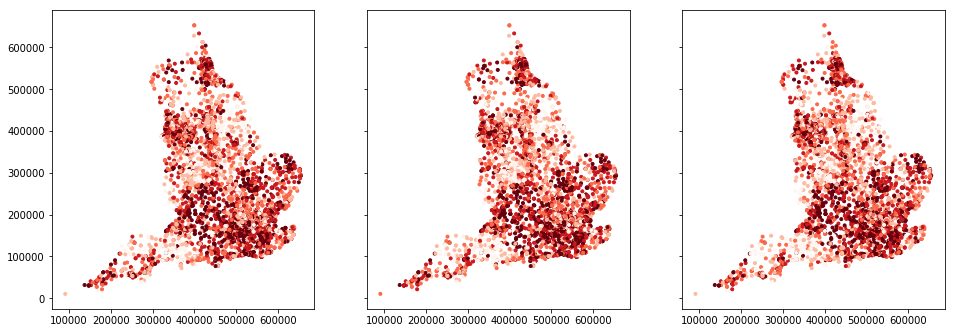

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,6), sharex = True, sharey = True)

geo_data[geo_data['Year'] == 2016].plot(column = 'loneills', scheme = 'quantiles', cmap = 'Reds', marker = '.', ax = ax1);
geo_data[geo_data['Year'] == 2017].plot(column = 'loneills', scheme = 'quantiles', cmap = 'Reds', marker = '.', ax = ax2);
geo_data[geo_data['Year'] == 2018].plot(column = 'loneills', scheme = 'quantiles', cmap = 'Reds', marker = '.', ax = ax3);
